In [ ]:
import csv
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
import os
stockNames=os.listdir("/content/drive/MyDrive/Colab Notebooks/data/csv-10-30/")
print(stockNames)

['AVC.csv', 'ASM.csv', 'BDB.csv', 'BSC.csv', 'ABT.csv', 'AGR.csv', 'C69.csv', 'APS.csv', 'APC.csv', 'BHT.csv', 'BIC.csv', 'ASG.csv', 'BDW.csv', 'BTP.csv', 'CCI.csv', 'BSI.csv', 'AGP.csv', 'C47.csv', 'BCP.csv', 'AMC.csv', 'API.csv', 'ADC.csv', 'AAA.csv', 'BPC.csv', 'ACC.csv', 'BCE.csv', 'BBS.csv', 'BKH.csv', 'CCL.csv', 'BTH.csv', 'AMV.csv', 'BMF.csv', 'BKG.csv', 'BST.csv', 'BII.csv', 'BLT.csv', 'BAB.csv', 'ALT.csv', 'BWA.csv', 'BMS.csv', 'APG.csv', 'BMC.csv', 'BSR.csv', 'AAM.csv', 'C32.csv', 'ABS.csv', 'ACL.csv', 'AAT.csv', 'BRC.csv', 'C21.csv', 'BCC.csv', 'AAV.csv', 'BCG.csv', '1-log-crawl.txt', 'RCL.csv', 'L18.csv', 'PSI.csv', 'FIC.csv', 'QNC.csv', 'CHP.csv', 'FLC.csv', 'SJG.csv', 'MKV.csv', 'DAT.csv', 'GMC.csv', 'NAV.csv', 'S4A.csv', 'DQC.csv', 'GEX.csv', 'MVB.csv', 'CTI.csv', 'DPP.csv', 'CLH.csv', 'KHA.csv', 'SED.csv', 'ITD.csv', 'KHG.csv', 'HBD.csv', 'DTC.csv', 'OCB.csv', 'HBC.csv', 'PVB.csv', 'HU1.csv', 'HC3.csv', 'HDB.csv', 'MIG.csv', 'PTS.csv', 'HT1.csv', 'DRH.csv', 'SGS.csv', '

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
#Chỉ dùng thuộc tính close để train => input shape=30, 1
def training():
  for name in stockNames[0:1]: # chọn các mã để train
    data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/csv-10-30/'+name,
                    names=[ 'date', 'adjust', 'close', 'change_perc', 'avg', 'volume_match', 'value_match', 
                              'volume_reconcile', 'value_reconcile', 'open', 'high', 'low', 'volume'])
    data.drop(["change_perc", "volume_match", "avg",
                            "value_match", "volume_reconcile", "value_reconcile"],  axis = 1, inplace = True)
    #chuẩn hóa
    scaler = StandardScaler()
    scaled = scaler.fit_transform(data.values[:, 2:3])#chỉ lấy thuộc tính close
    index=int(2*scaled.shape[0]/3)
    # print(index)
    X_train=scaled[0:index] #Train 2/3 data
    y_train=scaled[1:index+1]
    X_train=np.reshape(X_train, (index, 1 , 1))
    # print(X_train.shape)
    #Model
    regressor = Sequential()

    regressor.add(LSTM(units=1, activation= 'sigmoid', input_shape=(30, 1)))#cửa sổ 30, số chiều dữ liệu 1
    regressor.add(Dense(units=1))

    regressor.compile(optimizer='adam', loss='mean_squared_error')
    history=regressor.fit(X_train, y_train, batch_size=4, epochs=150)
    regressor.save('outputModels/'+name[:-4]+'.h5')
    print('Saved '+ name)






In [ ]:
training()

Epoch 1/150
154/154 [==============================] - 1s 2ms/step - loss: 1.1964
Epoch 2/150
154/154 [==============================] - 0s 2ms/step - loss: 1.1421
Epoch 3/150
154/154 [==============================] - 0s 2ms/step - loss: 1.1159
Epoch 4/150
154/154 [==============================] - 0s 2ms/step - loss: 1.1033
Epoch 5/150
154/154 [==============================] - 0s 2ms/step - loss: 1.0945
Epoch 6/150
154/154 [==============================] - 0s 2ms/step - loss: 1.0847
Epoch 7/150
154/154 [==============================] - 0s 2ms/step - loss: 1.0705
Epoch 8/150
154/154 [==============================] - 0s 2ms/step - loss: 1.0452
Epoch 9/150
154/154 [==============================] - 0s 2ms/step - loss: 1.0100
Epoch 10/150
154/154 [==============================] - 0s 2ms/step - loss: 0.9682
Epoch 11/150
154/154 [==============================] - 0s 2ms/step - loss: 0.9223
Epoch 12/150
154/154 [==============================] - 0s 2ms/step - loss: 0.8745
Epoch 13/150


In [ ]:
from tensorflow import keras
def test(name):
  model = keras.models.load_model('outputModels/'+name+'.h5')
  data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/csv-10-30/'+name+'.csv',
                    names=[ 'date', 'adjust', 'close', 'change_perc', 'avg', 'volume_match', 'value_match', 
                              'volume_reconcile', 'value_reconcile', 'open', 'high', 'low', 'volume'])
  data.drop(["change_perc", "volume_match", "avg",
                          "value_match", "volume_reconcile", "value_reconcile"],  axis = 1, inplace = True)
  scaler = StandardScaler()
  scaled = scaler.fit_transform(data.values[:, 2:3])#chỉ lấy thuộc tính close

  index=int(2*scaled.shape[0]/3)
  inputs = scaled[index:]
  inputs = np.reshape(inputs, (inputs.shape[0], 1, 1))
  predicted_stock_price = model.predict(inputs)#predict
  predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
  predicted_stock_price=predicted_stock_price.reshape(inputs.shape[0])

  real_stock_price=data.values[index:, 2:3].reshape(inputs.shape[0])#real from data

  loss=0
  for i in range(len(real_stock_price)):
    loss+=predicted_stock_price[i]-real_stock_price[i]
  print('Sum loss: '+str(loss))

  plt.plot( real_stock_price[:] , color = 'red' , label = 'Real Stock Price')
  plt.plot( predicted_stock_price[:], color = 'green' , label = 'Predicted Stock Price')
  plt.title('Stock Price Prediction '+name)
  plt.xlabel('time' )
  plt.ylabel('Stock Price')
  plt.legend()
  plt.show()



Sum loss: -13.016020965576182


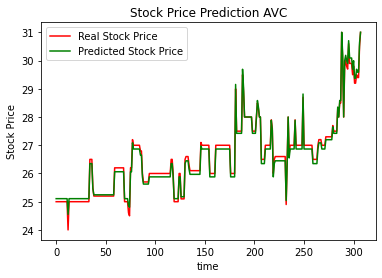

In [ ]:
test('AVC')